In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Residential

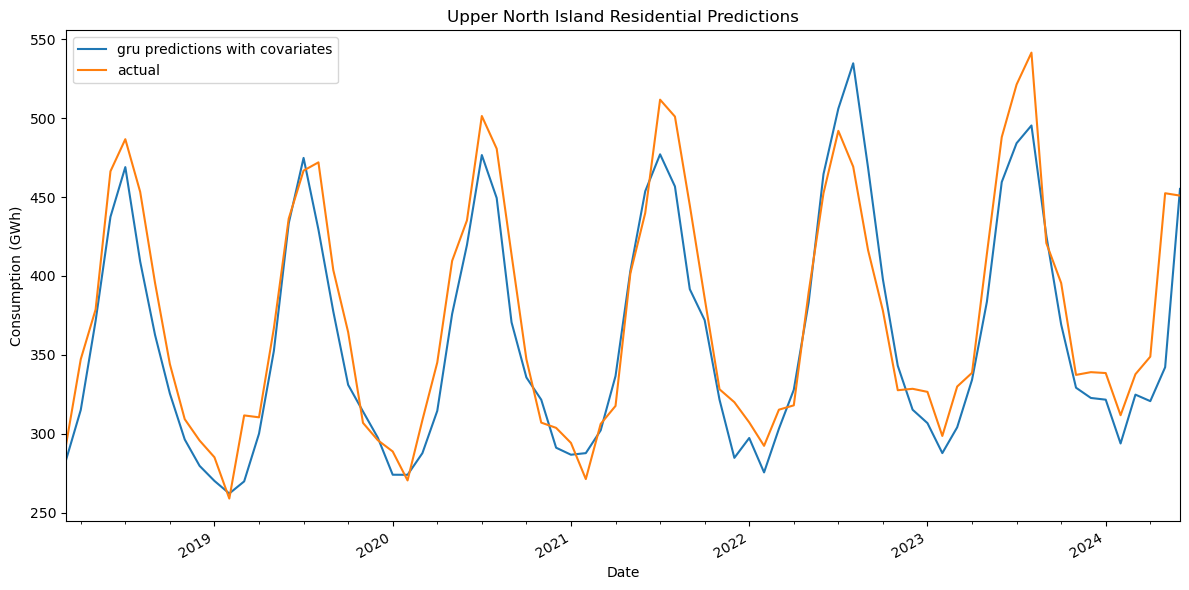

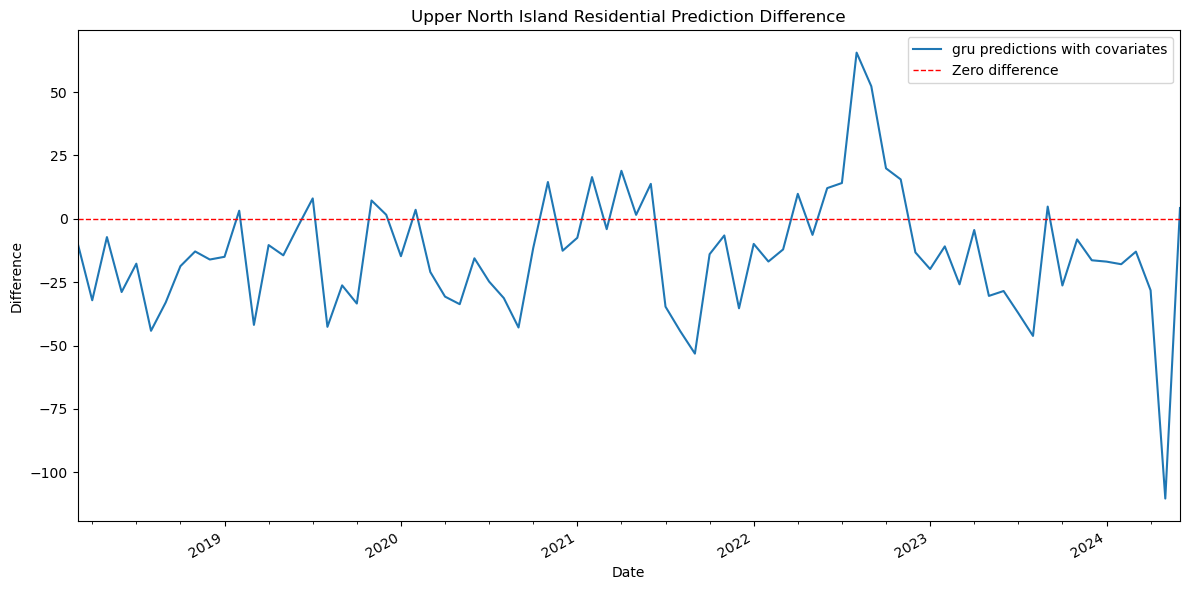

In [11]:
zones = ['UNI', 'CNI', 'LNI', 'USI', 'LSI']

gru_uni = pd.read_csv('../RNN_test/residential/GRU_covariates,UNI,res.csv', parse_dates=[0], index_col=0)

# plot of prediction vs actual
plt.figure(figsize=(12, 6))
gru_uni['predictions'].plot(label='gru predictions with covariates')
gru_uni['Est. Total consumption (GWh)'].plot(label='actual')
plt.title('Upper North Island Residential Predictions')
plt.xlabel('Date')
plt.ylabel('Consumption (GWh)')
plt.legend()

plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

# plot of difference
plt.figure(figsize=(12, 6))
gru_uni['difference'].plot(label='gru predictions with covariates')
plt.axhline(y=0, color='r', linestyle='--', linewidth=1, label='Zero difference')
plt.title('Upper North Island Residential Prediction Difference')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.legend()

plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

## Business